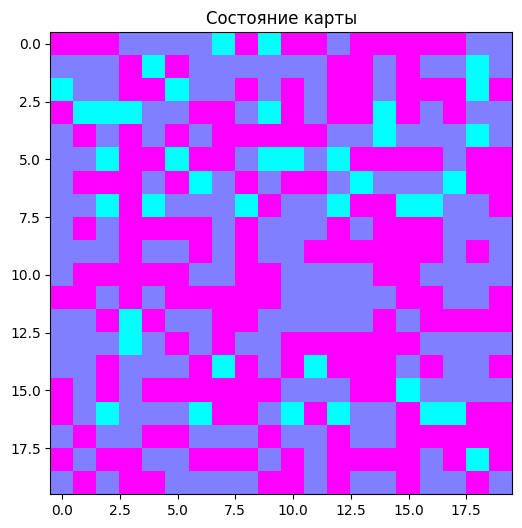

Шаг: 10


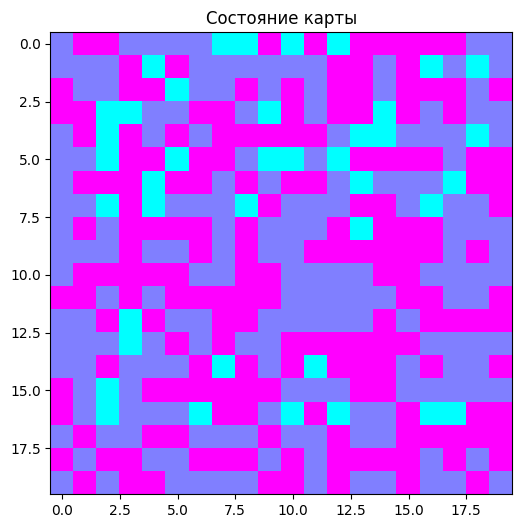

Несчастный: (1, 16), Пустой: (7, 15)
Пустых клеток: 40 | Несчастных клеток: 33
Шаг: 20


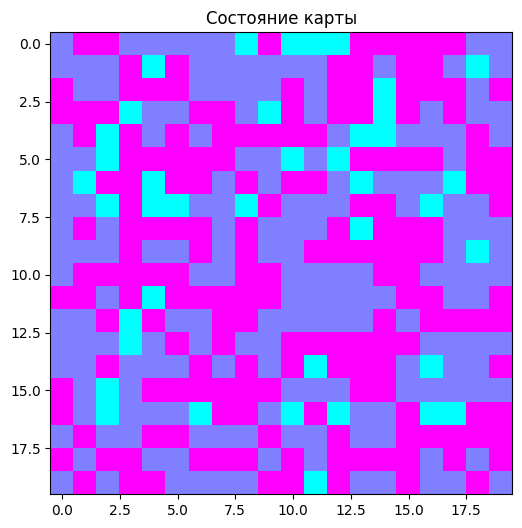

Несчастный: (19, 11), Пустой: (2, 8)
Пустых клеток: 40 | Несчастных клеток: 22
Шаг: 30


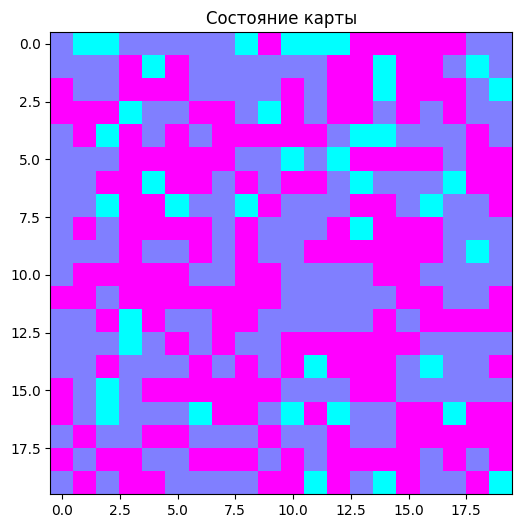

Несчастный: (0, 2), Пустой: (11, 4)
Пустых клеток: 40 | Несчастных клеток: 19
Шаг: 40


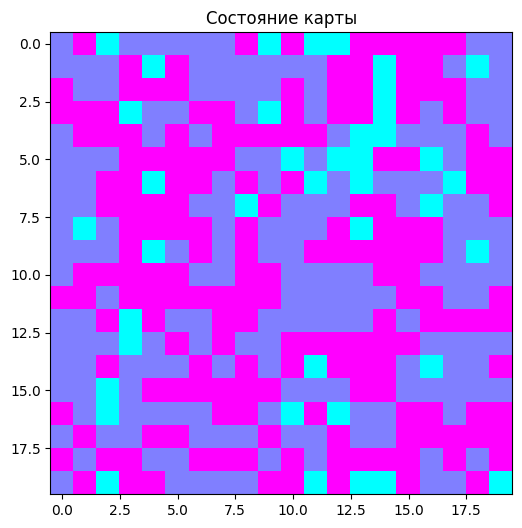

Несчастный: (3, 14), Пустой: (15, 0)
Пустых клеток: 40 | Несчастных клеток: 17
Шаг: 50


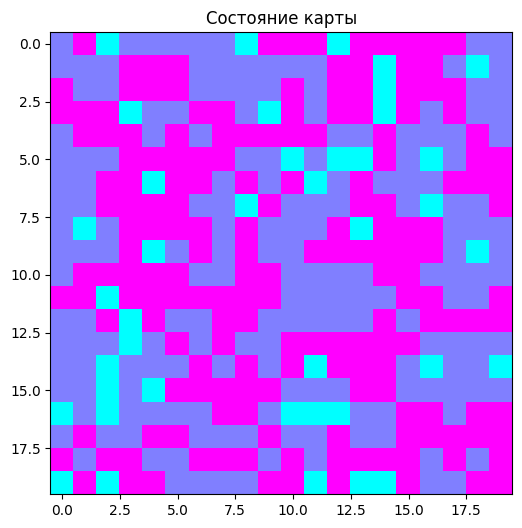

Несчастный: (15, 4), Пустой: (0, 9)
Пустых клеток: 40 | Несчастных клеток: 8


In [17]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

class Map:
    def __init__(self, size, typeA, typeB, empty):
        if size < 10:
            size = 10
        self.size = size
        self.celles = np.full((size, size), empty)  # Заполнение пустыми клетками
        self.typeA = typeA
        self.typeB = typeB
        self.empty = empty
        self.countA = self.countB = size * size * 45 // 100  # 45% для типа A и типа B
        self.countShuffle = 5
        self.Emptys = []
        self.unHappys = []
        self.FillEmpty()

    class Point:
        def __init__(self, x, y):
            self.x = x
            self.y = y

    def FillEmpty(self):
        for i in range(self.size):
            for j in range(self.size):
                self.celles[i, j] = self.empty

    def Create(self):
        count = 0
        # Заполнение клеток типа A
        for count in range(self.countA):
            self.celles[count % self.size, count // self.size] = self.typeA
        # Заполнение клеток типа B
        for count in range(self.countA, self.countA + self.countB):
            self.celles[count % self.size, count // self.size] = self.typeB
        # Перемешивание клеток
        for _ in range(self.countShuffle):
            self.shuffleCelles()
        self.SetUnHappy()
        self.SetEmpty()

    def shuffleCelles(self):
        for i in range(self.size):
            for j in range(self.size):
                rand_i = i + random.randint(0, self.size - i - 1)
                rand_j = j + random.randint(0, self.size - j - 1)
                self.swap(i, j, rand_i, rand_j)

    def swap(self, i, j, rand_i, rand_j):
        self.celles[i, j], self.celles[rand_i, rand_j] = self.celles[rand_i, rand_j], self.celles[i, j]

    def SetEmpty(self):
        self.Emptys.clear()
        for i in range(self.size):
            for j in range(self.size):
                if self.celles[i, j] == self.empty:
                    self.Emptys.append(self.Point(i, j))

    def SetUnHappy(self):
        self.unHappys.clear()
        for i in range(self.size):
            for j in range(self.size):
                if self.celles[i, j] == self.empty:
                    continue
                count = 0
                # Проверка соседей
                if i != 0 and self.celles[i, j] == self.celles[i - 1, j]:
                    count += 1
                if i != self.size - 1 and self.celles[i, j] == self.celles[i + 1, j]:
                    count += 1
                if j != 0 and self.celles[i, j] == self.celles[i, j - 1]:
                    count += 1
                if j != self.size - 1 and self.celles[i, j] == self.celles[i, j + 1]:
                    count += 1
                if i != 0 and j != 0 and self.celles[i, j] == self.celles[i - 1, j - 1]:
                    count += 1
                if i != 0 and j < self.size - 1 and self.celles[i, j] == self.celles[i - 1, j + 1]:
                    count += 1
                if i != self.size - 1 and j != 0 and self.celles[i, j] == self.celles[i + 1, j - 1]:
                    count += 1
                if i != self.size - 1 and j != self.size - 1 and self.celles[i, j] == self.celles[i + 1, j + 1]:
                    count += 1
                if count < 2:
                    self.unHappys.append(self.Point(i, j))

    def Step(self):
        indexUHP = random.randint(0, len(self.unHappys) - 1)
        indexEMP = random.randint(0, len(self.Emptys) - 1)
        _empty = self.Emptys[indexEMP]
        _unHappy = self.unHappys[indexUHP]
        self.swap(_unHappy.x, _unHappy.y, _empty.x, _empty.y)
        self.SetEmpty()
        self.SetUnHappy()
        return _unHappy, _empty

    def show(self):
        plt.figure(figsize=(6, 6))
        plt.imshow(self.celles, cmap='cool', interpolation='nearest')
        plt.title('Состояние карты')
        plt.show()

    def algorithmStart(self, maxCountStep, delay):
        count = 0
        self.show()
        while len(self.unHappys) != 0 and count < maxCountStep:
            count += 1
            _unHappy, _empty = self.Step()
            if count % 10 == 0:  # Печать каждые 15 шагов
                print(f"Шаг: {count}")
                self.show()
                print(f"Несчастный: ({_unHappy.x}, {_unHappy.y}), Пустой: ({_empty.x}, {_empty.y})")
                print(f"Пустых клеток: {len(self.Emptys)} | Несчастных клеток: {len(self.unHappys)}")
                print("===================================")
            if count in [50, 100, 250, 500, 1000]:
                time.sleep(delay)

# Инициализация карты
size = 20  # Размер карты
typeA = 1  # Тип A
typeB = 2  # Тип B
empty = 0  # Пустая клетка

# Создание объекта карты
game_map = Map(size, typeA, typeB, empty)

# Создание начальной карты
game_map.Create()

# Запуск алгоритма с максимальным количеством шагов 1000 и задержкой в 0.1 секунды
game_map.algorithmStart(maxCountStep=1000, delay=0.2)
